In [3]:
%matplotlib inline

In [4]:
%matplotlib inline 
from skimage.color import rgb2hsv
from skimage.io import imread, imshow, show
from scipy.ndimage import binary_fill_holes
from skimage.measure import label
from skimage.color import label2rgb
from skimage.morphology import binary_closing
from skimage.transform import resize
from skimage.measure import regionprops
import numpy as np
import matplotlib.pyplot as plt

In [5]:
obrazek = imread("b.jpg")
w = 400
h = obrazek.shape[1] * w // obrazek.shape[0]
obrazek = resize(obrazek, (w, h))

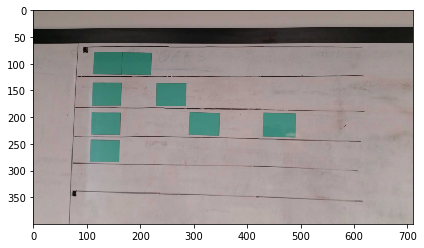

In [6]:
imshow(obrazek)
show()

In [7]:
o = rgb2hsv(obrazek)
h = o[:,:,0]
s = o[:,:,1]
v = o[:,:,2]
land, lor = np.logical_and, np.logical_or
ramki = land(
    s > 0.1,
    land(
        lor(h < 0.05, h > 0.95),
        v < 0.7
    ),
)
x = binary_fill_holes(ramki)
labeled = label(x)
l2rgb = label2rgb(labeled, image=obrazek, bg_label=0)

/home/noemi/PycharmProjects/nospr-kopytko/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


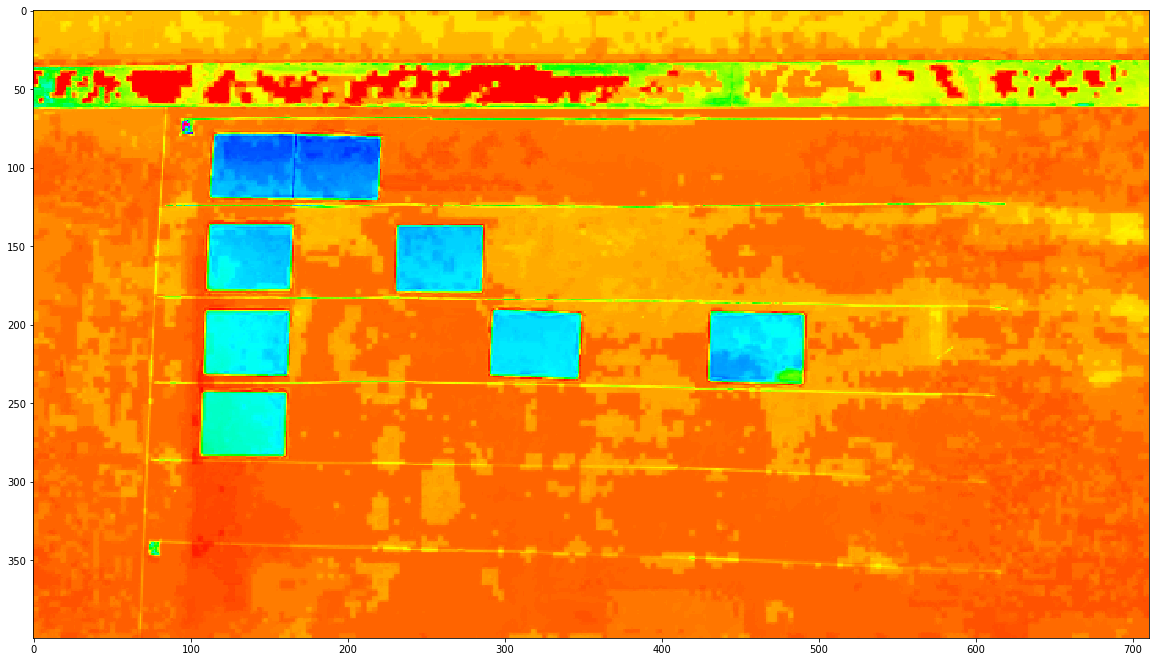

In [9]:
fig = plt.figure(figsize=(20, 20))
data = [
    (h, 'hsv'),
    (s, 'Greys'),
    (v, 'gray'),
    (ramki, 'gray'),
    (x, 'gray'),
    (l2rgb, 'gray'),
]
ldata = len(data)

# for i, (im, cmap) in enumerate(data, start=1):
#     ax = fig.add_subplot(1, ldata, i, xticks=[], yticks=[])
#     ax.imshow(im, cmap=cmap)


imgplot = plt.imshow(s, cmap=data[0][1])
fig.show()

/home/noemi/PycharmProjects/nospr-kopytko/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


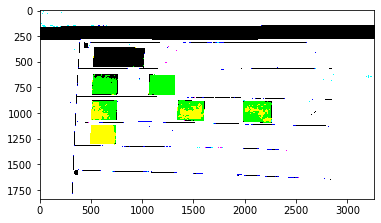

In [10]:

import cv2
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

img = cv2.imread('b.jpg')

ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

imgplot = plt.imshow(bw_img)
fig.show()

/home/noemi/PycharmProjects/nospr-kopytko/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


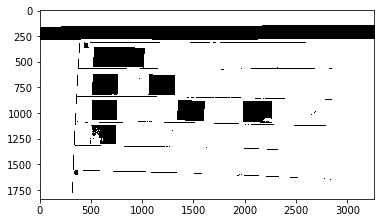

In [11]:


from PIL import Image

col = Image.open("b.jpg")
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<128 else 255, '1')
imgplot = plt.imshow(bw)
fig.show()

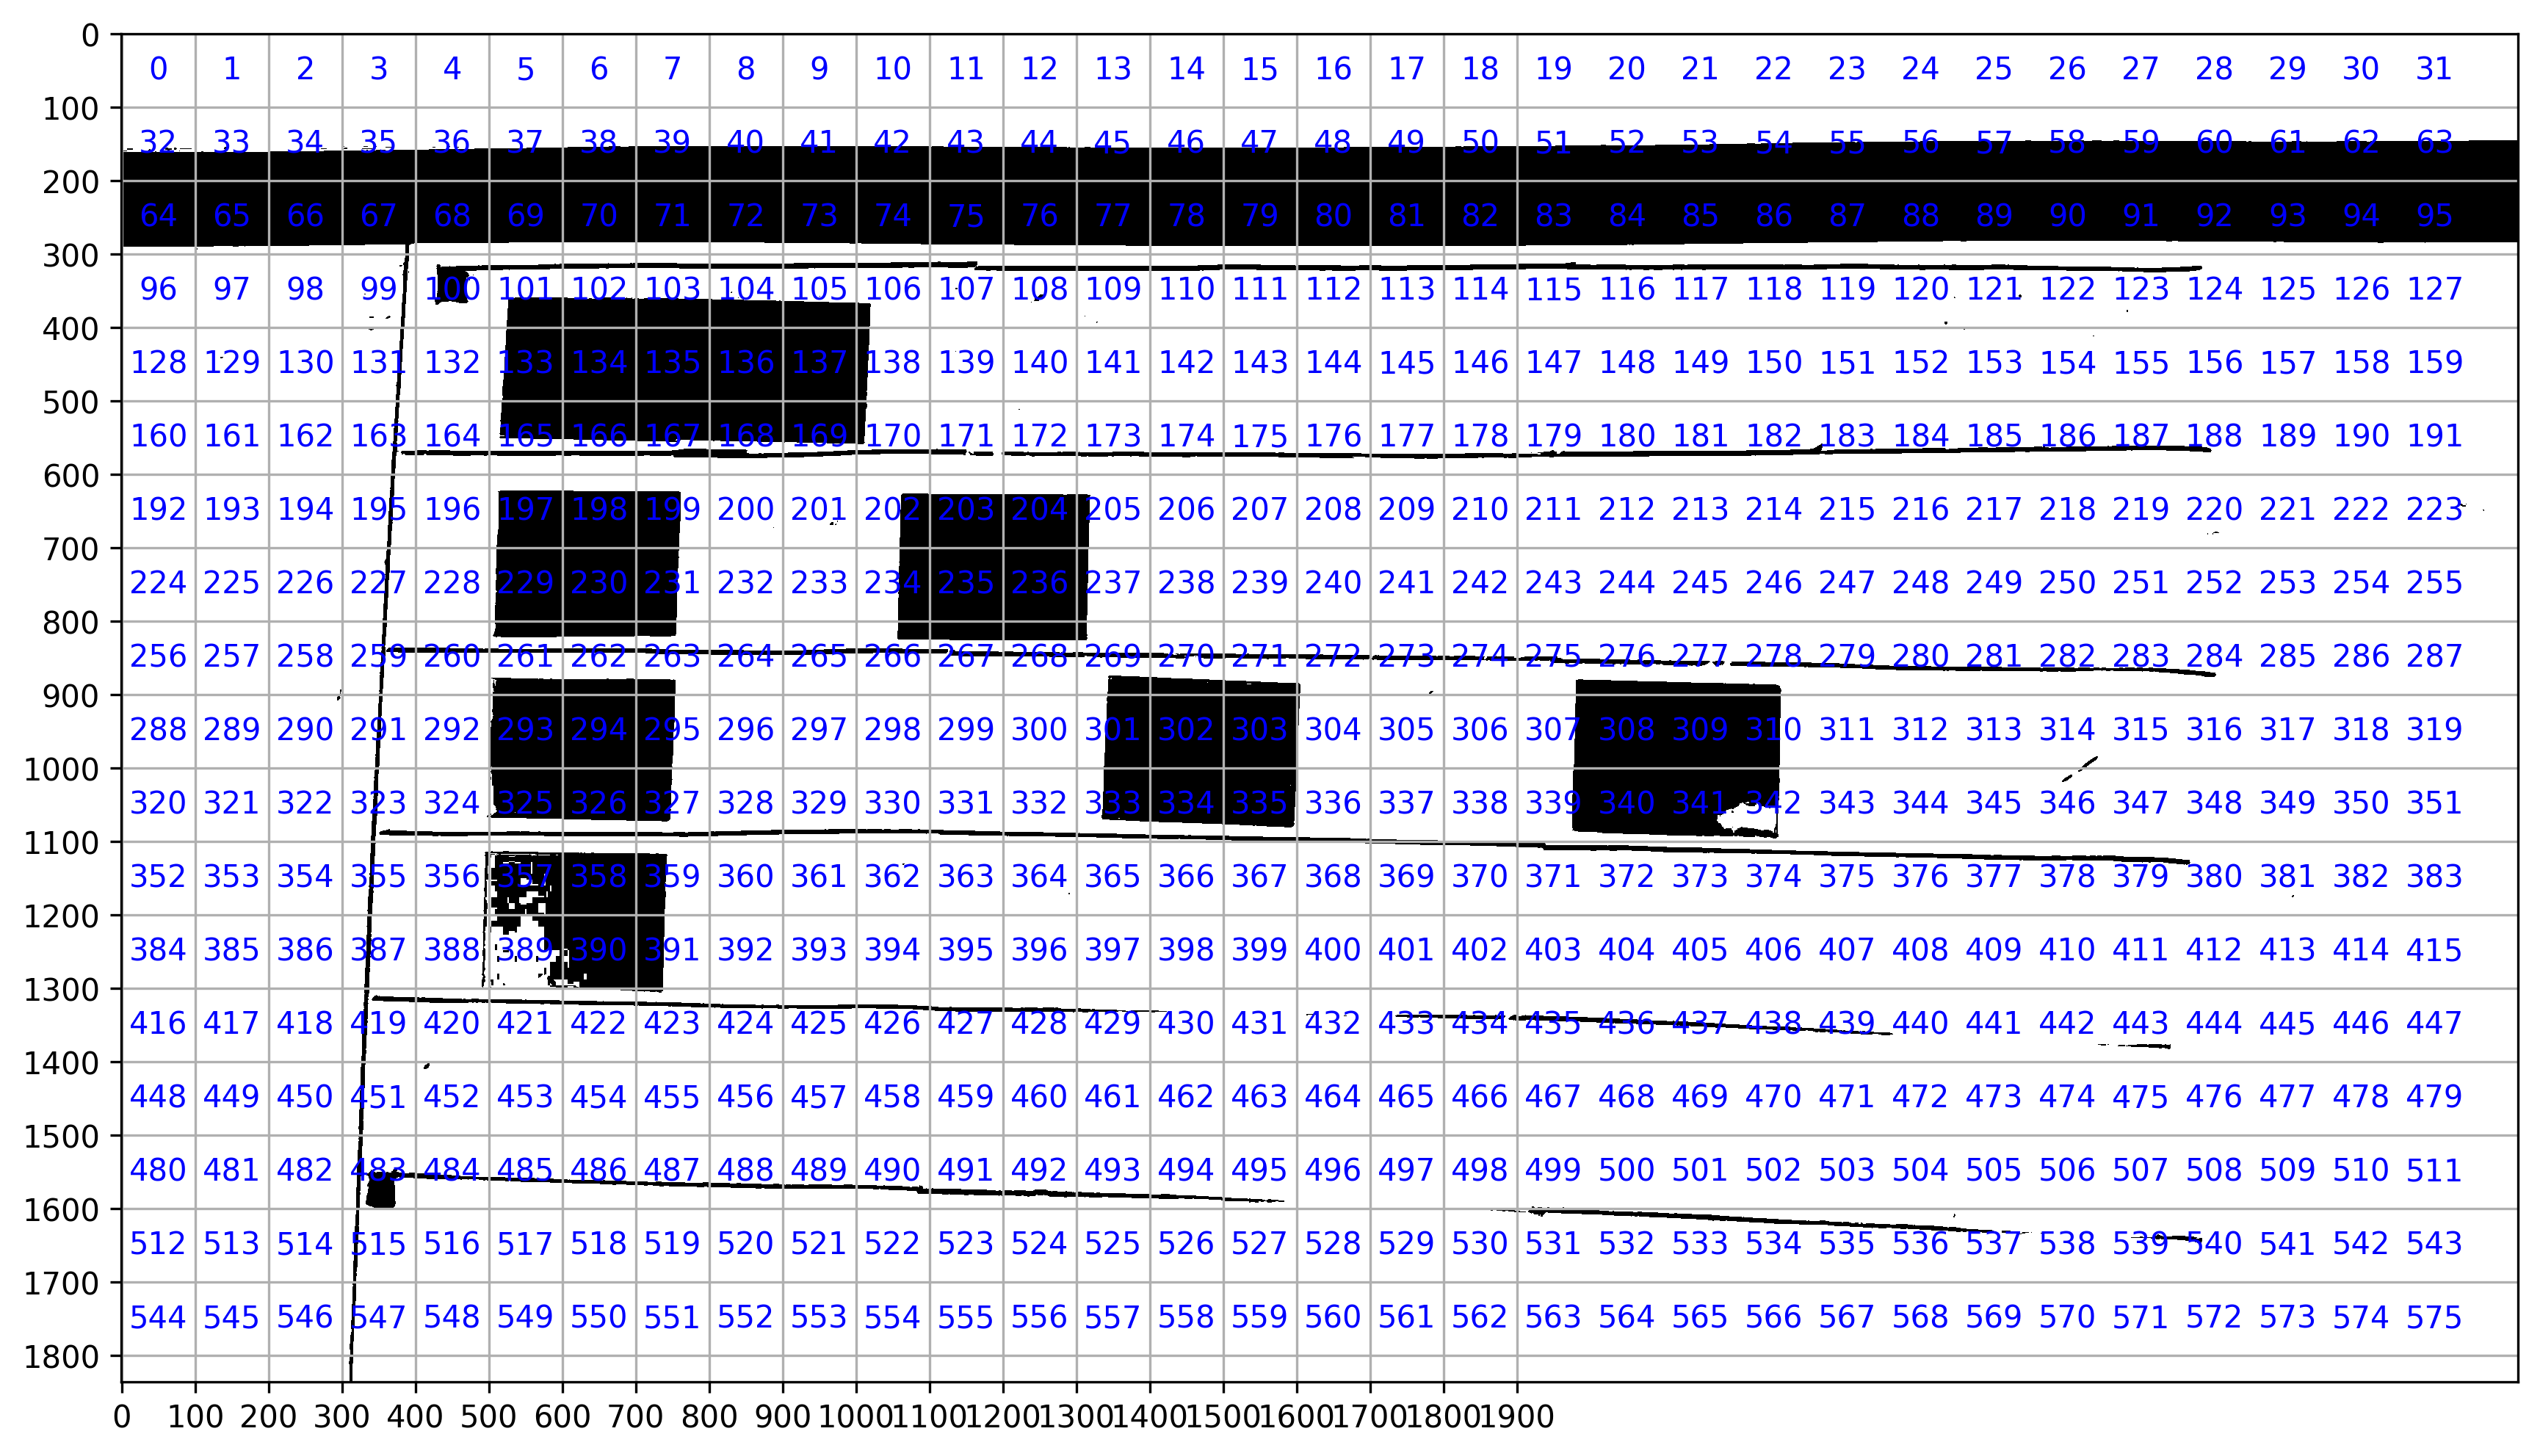

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
# image = Image.open('b.tiff')
my_dpi=300.

# Set up figure
fig=plt.figure(figsize=(float(bw.size[0])/my_dpi,float(bw.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(bw)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
for j in range(ny):
    y=myInterval/2+j*myInterval
    for i in range(nx):
        x=myInterval/2.+float(i)*myInterval
        
        ax.text(x,y,'{:d}'.format(i+j*nx),color='b',ha='center',va='center')

# Save the figure
# fig.savefig('yolo.jpg',dpi=my_dpi)

In [60]:
# import image_slicer
# all_rectangles = image_slicer.slice('b.jpg', 14)

# for i in all_rectangles:
#     image.show()

AttributeError: 'ImageDraw' object has no attribute 'show'

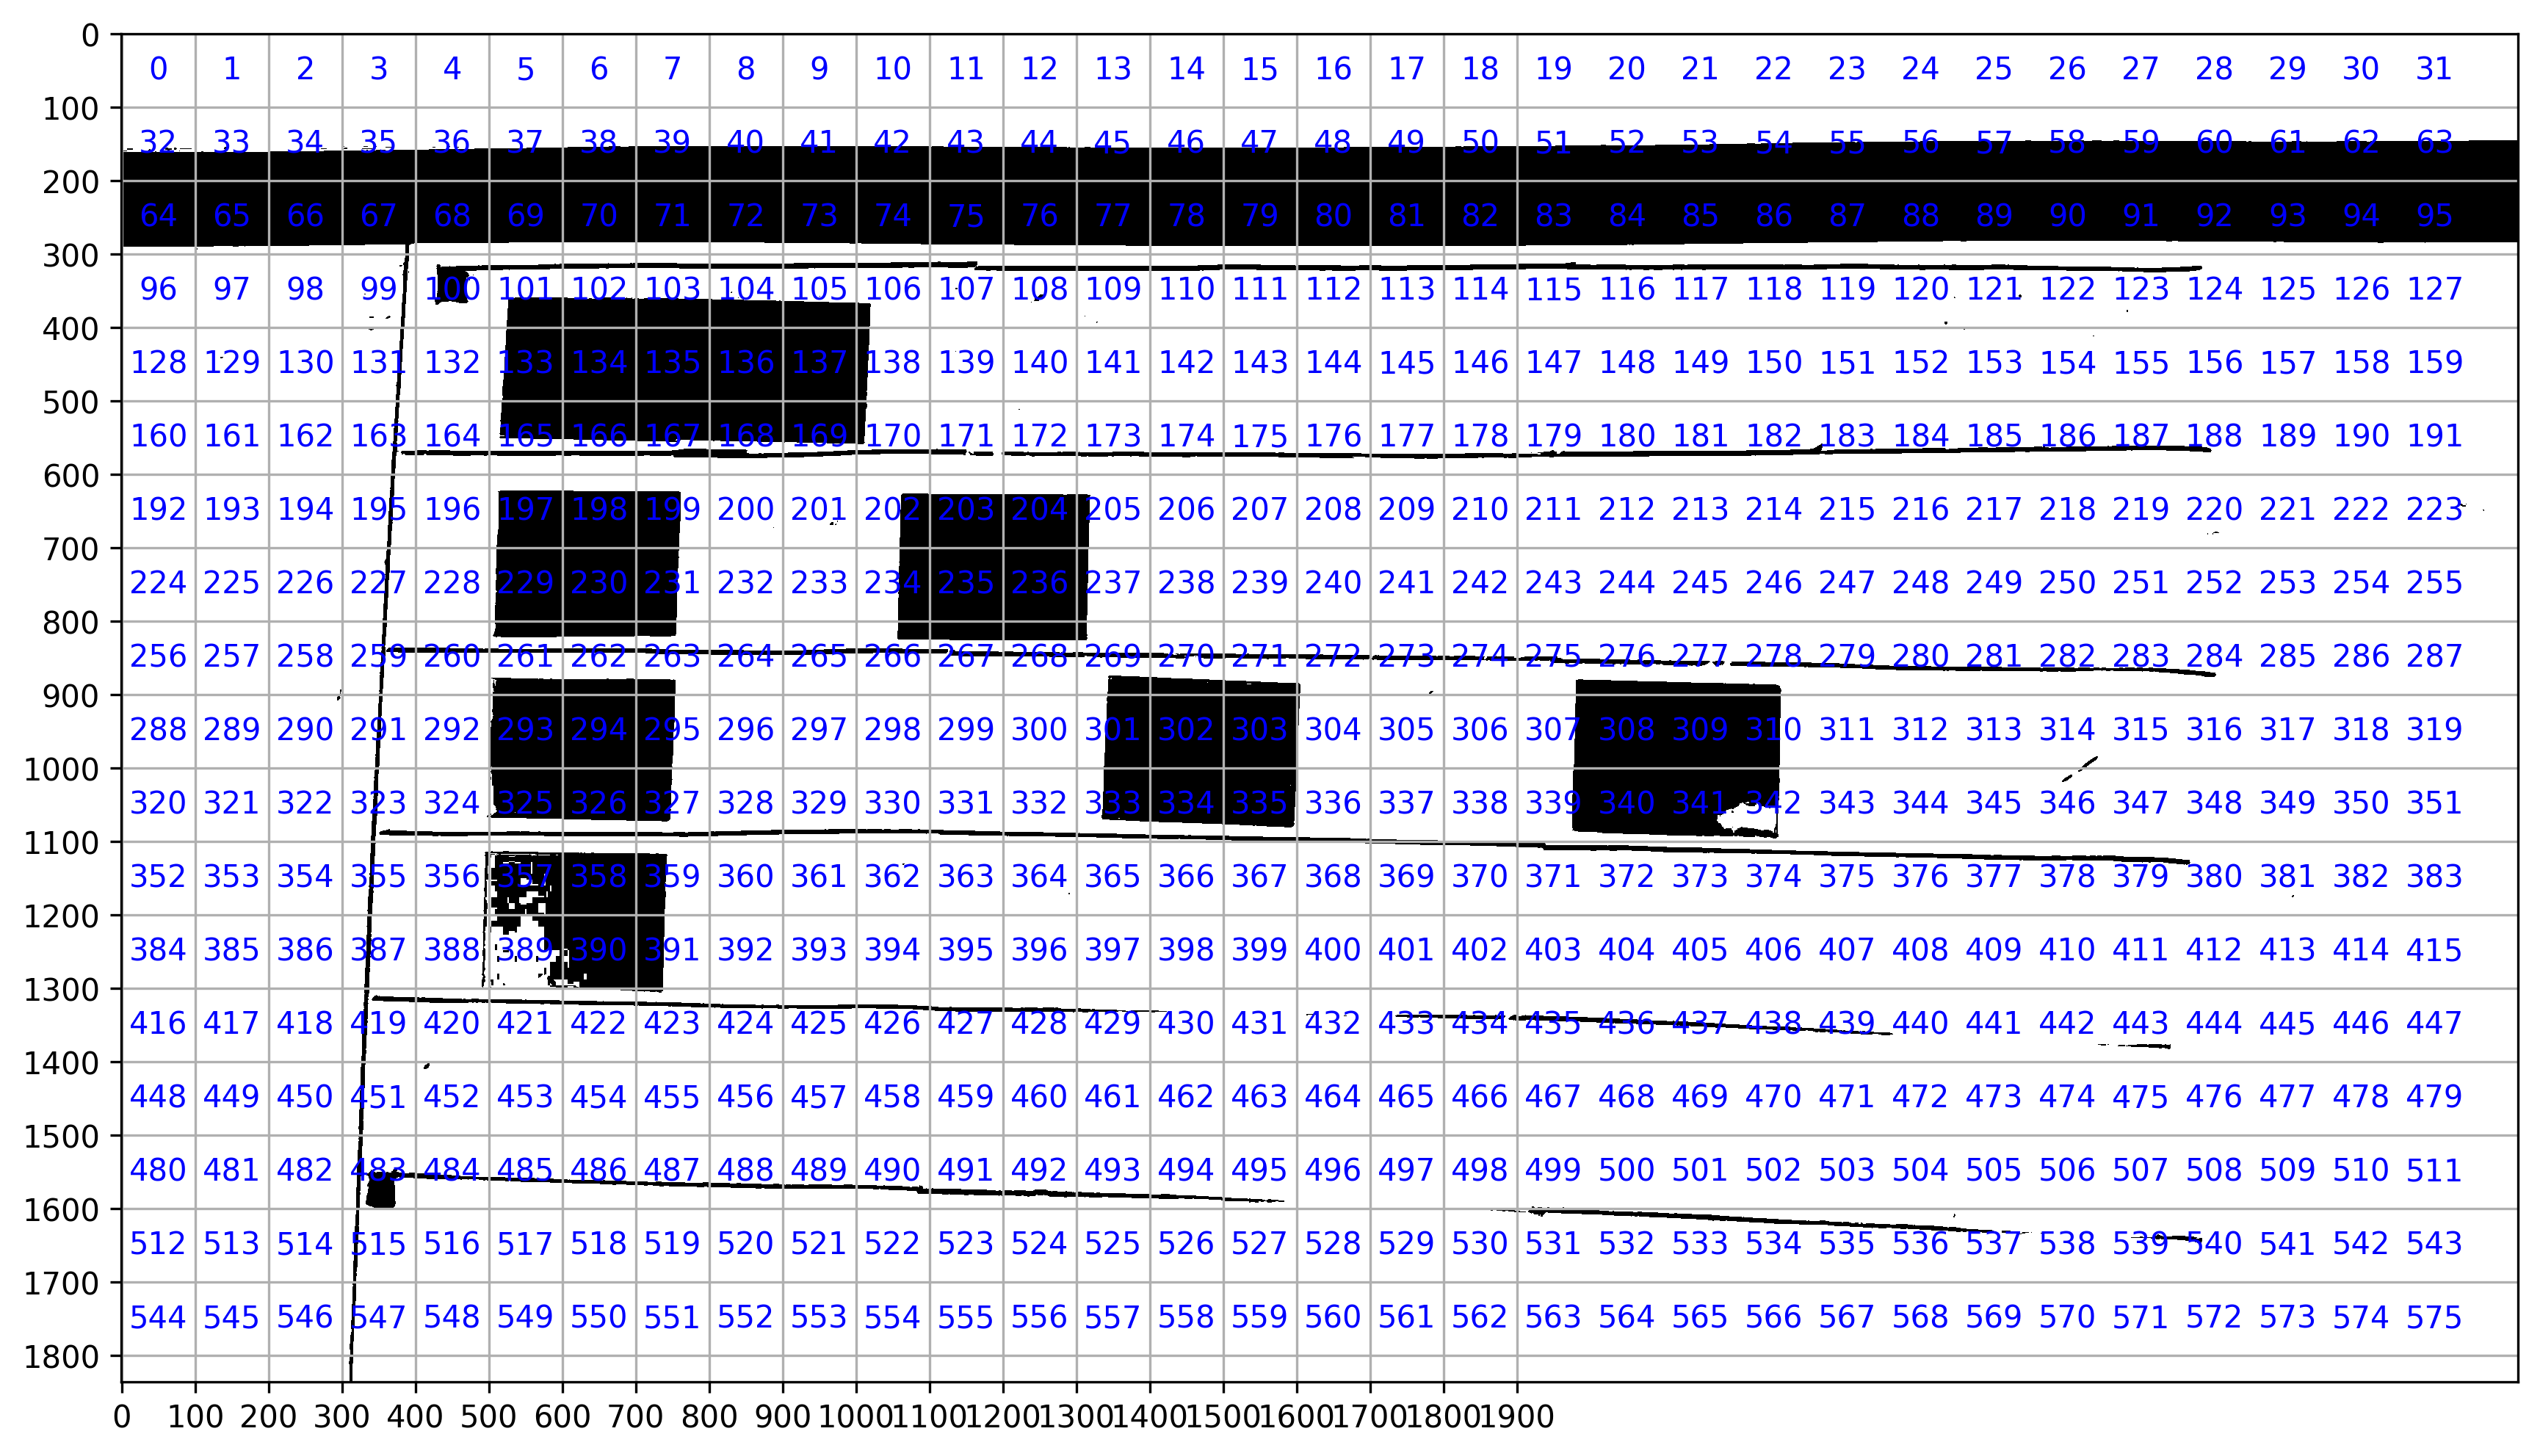

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
# image = Image.open('b.tiff')
my_dpi=300.

# Set up figure
fig=plt.figure(figsize=(float(bw.size[0])/my_dpi,float(bw.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(bw)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
for j in range(ny):
    y=myInterval/2+j*myInterval
    for i in range(nx):
        x=myInterval/2.+float(i)*myInterval
        cropped = bw.crop((100,30,400,300))
#         cropped.show() /// DONT DO THAT
        ax.text(x,y,'{:d}'.format(i+j*nx),color='b',ha='center',va='center')